# Dense Layers

## Equipo 4:


*   Karla Andrea Palma Villanueva (A01754270)
*   Viviana Alanis Fraige (A01236316)
* David Fernando Armendariz Torres (A01570813)
* Alan Alberto Mota Yescas (A01753924)
* Adrián Chávez Morales (A01568679)
* Jose Manuel Armendáriz Mena (A01197583)

### Introducción

El propósito de este notebook es implementar y evaluar un modelo de red neuronal densa para clasificación de datos en un conjunto de datos formulado a partir de la base de datos de Iris, incrementado con una columna adicional señalando al tipo de suelo. Lo que el modelo realiza es la predicción la especie de una planta en base a sus atributos físicos y al suelo en el cual se encuentra ubicado. Para ello, se prueban distintas arquitecturas para redes neuronales profundas con el fin de ver cuál de ellas tiene un mejor desempeño en términos de precisión de clasificación.

El flujo de trabajo consta de varias etapas clave. Primero, los datos se preprocesan y se transforman las variables categóricas en una representación numérica utilizando la codificación one-hot y la creación de variables dummy. Las características se normalizan para mejorar la convergencia y el rendimiento del modelo. Luego, e modelo se define y se entrenan varias configuraciones de redes neuronales densas, que varían en el número de capas ocultas, el número de neuronas por capa, la tasa de aprendizaje del optimizador, y el tamaño de los lotes durante el entrenamiento. Entrenamos el modelo en un conjunto de datos de entrenamiento y lo evaluamos en un conjunto de prueba.

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# The seed is used to ensure that the model results can be replicated
sd = 11
np.random.seed(sd)

### Explicación de datos

El notebook presentado en este informe fue implementado utilizando el dataset extraído de Kaggle (https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended). El dataset manipulado es una extensión Iri, el cual es frecuentemente utilizado en el campo de la ciencia de datos y el aprendizaje máquina hecho originalmente por Fisher en 1936. El dataset original se llama Iris porque contiene 150 registros de iris, mostrando 4 features físicas de cada muestra: sepal length, sepal width, petal length y petal width. Además, la recolección de datos clasifica las muestras en 3 especies: Setosa, Versicolor y Virginica.

En este, se ha añadido una nueva columna denominada 'soil_type' al dataset el cual, indica en qué tipo de suelo (el primero de la lista proporcionada o el segundo) crece la planta. El objetivo de esta extensión del dataset es proporcionar más información acerca del entorno de la planta, lo que puede alterar su clasificación. Generalizar los datos de esta forma, la inclusión de la columna mencionada anteriormente expande la data disponible. Proporciona un entorno ampliado para un análisis más complejo, donde el entorno en el que crecieron las flores podría afectar el rendimiento en la predicciones de las plantas. Para ser más específico, el nuevo dataset contiene datos acerca del suelo en el que crecieron las flores, además de sus medidas físicas.

### Cargar los datos

In [ ]:
df= pd.read_csv('iris_extended.csv')
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


### Análisis del Dataset

Número de columnas: El dataset tiene 22 columnas en total, que incluyen tanto características físicas de las plantas como información sobre el tipo de suelo. Algunas de las columnas clave son:



1.   species: La variable objetivo que indica la especie de la planta (Setosa,Versicolor, o Virginica).
2.   elevation: Altitud en la que se encuentra la planta.
3.   soil_type: Tipo de suelo (sandy, clay, loamy), que fue añadido como una extensión del dataset original de Iris.
4.   Características físicas de las flores, como sepal_length, sepal_width, petal_length, y petal_width, así como otras derivadas de estas, como áreas y relaciones de aspecto.


Número de instancias: El dataset contiene 1200 instancias en total, lo que significa que se tienen 1200 muestras de flores con sus respectivas características y la información de su especie.

Tipos de datos: La mayoría de las columnas son de tipo float64, que representan valores numéricos continuos. La columna species es de tipo object, ya que contiene las clases (especies de flores) en formato texto. Las columnas correspondientes al tipo de suelo (clay, loamy) son de tipo booleano (bool), lo que indica si el suelo tiene esas características o no.

Valores no nulos: Todas las columnas del dataset tienen 1200 valores no nulos, lo que indica que no hay valores faltantes en ninguna de las características o variables objetivo, lo cual facilita el procesamiento del dataset sin necesidad de imputar datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [ ]:
df['species'].value_counts()

,count
species,
setosa,400
versicolor,400
virginica,400


Este resultado indica que el dataset está perfectamente balanceado en cuanto al número de instancias por cada clase, ya que cada especie tiene exactamente el mismo número de muestras (400). Tener un dataset balanceado es ideal para problemas de clasificación, ya que reduce el riesgo de que el modelo favorezca una clase en particular y mejora la capacidad de generalización del mismo.

### Dividir los datos en conjuntos de entrenamiento y de prueba

In [ ]:
# Convertir las columnas binarias
soil_type = pd.get_dummies(df["soil_type"])

# Concatenar las nuevas columnas
df = pd.concat([df, soil_type], axis=1)

# Eliminar columnas
df.drop("soil_type", axis=1, inplace=True)
df.drop("sandy", axis=1, inplace=True)


In [ ]:
# separa las características (X) de la variable objetivo (y).
X = df.drop("species", axis = 1)
y = df["species"]

# Convertir las etiquetas de la variable objetivo en valores numéricos.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
# Datos de entrenamiento: 80%
# Datos de prueba: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalización de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Convertir la variable objetivo a formato one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


### Entrenamiento del modelo

In [ ]:
# Definición de una arquitectura densa para una red neuronal con Keras
def dense_architecture():
    model = keras.Sequential(name='Dense_model')
    model.add(layers.Dense(units=64, input_shape=X_train[0].shape, activation='relu', # Primera capa oculta densa con 64 neuronas
                           kernel_initializer=tf.keras.initializers.HeUniform(seed=0),
                           bias_initializer='ones', name='hidden_layer_1'))
    model.add(layers.Dense(units=128, activation='relu', name='hidden_layer_2')) # Segunda capa oculta densa con 128 neuronas
    model.add(layers.Dense(units=128, activation='relu', name='hidden_layer_3')) # Tercera capa oculta densa con 128 neuronas
    model.add(layers.Dense(units=128, activation='relu', name='hidden_layer_4')) # Cuarta capa oculta densa con 128 neuronas
    model.add(layers.Dense(units=128, activation='relu', name='hidden_layer_5')) # Quinta capa oculta densa con 128 neuronas
    model.add(layers.Dense(units=64, activation='relu', name='hidden_layer_6'))  # Sexta capa oculta densa con 64 neuronas
    model.add(layers.Dense(units=64, activation='relu', name='hidden_layer_7'))  # Septima capa oculta densa con 64 neuronas
    model.add(layers.Dense(units=64, activation='relu', name='hidden_layer_8'))  # Octava capa oculta densa con 64 neuronas
    model.add(layers.Dense(units=64, activation='relu', name='hidden_layer_9'))  # Novena capa oculta densa con 64 neuronas
    model.add(layers.Dense(units=3, activation='softmax', name='output_layer'))  # Capa de salida con 3 neuronas
    model.summary()
    return model

model_DN = dense_architecture()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Dense_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_3 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_4 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_5 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_6 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_7 (Dense)               │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_8 (Dense)               │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_9 (Dense)               │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,195 (313.26 KB)

 Trainable params: 80,195 (313.26 KB)

 Non-trainable params: 0 (0.00 B)

Adam es un optimizador que combina las ventajas de AdaGrad y RMSProp, ajustando las tasas de aprendizaje para cada parámetro, es útil para problemas de entrenamiento en redes profundas.

In [ ]:
# Optimizador Adam con una tasa de aprendizaje de 0.0001
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)


In [ ]:
# Compilación del modelo
model_DN.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Entrenamiento del modelo con los datos de entrenamiento (X_train, y_train)
model_DN.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.4330 - loss: 1.0628 - val_accuracy: 0.6708 - val_loss: 0.9187
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6492 - loss: 0.8616 - val_accuracy: 0.6708 - val_loss: 0.5817
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7008 - loss: 0.5338 - val_accuracy: 0.9292 - val_loss: 0.3381
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9679 - loss: 0.2796 - val_accuracy: 0.9875 - val_loss: 0.1561
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9897 - loss: 0.1230 - val_accuracy: 0.9917 - val_loss: 0.0607
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9921 - loss: 0.0476 - val_accuracy: 0.9833 - val_loss: 0.0368
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9952 - loss: 0.0274 - val_accuracy: 0.9917 - val_loss: 0.0346
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9917 - loss: 0.0334 - val_accuracy: 0.9917 - va

### Predicciones

In [ ]:
# Predicción del modelo sobre los datos de prueba
y_pred = model_DN.predict(X_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
# Conversión de las predicciones de probabilidades a clases predichas
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)


In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9958333333333333
Confusion Matrix:
 [[87  0  0]
 [ 0 78  1]
 [ 0  0 74]]


La gráfica muestra que el modelo tiende a hacer predicciones con alta confianza, concentrando la mayoría de los valores predichos cerca de 0 y 1, lo que sugiere que asigna probabilidades muy cercanas a las clases objetivo, con poca incertidumbre en el rango intermedio (0.2 a 0.8). La distribución de las tres clases parece ser relativamente equilibrada, lo que sugiere que el modelo no tiene un sesgo claro hacia una clase en particular. Sin embargo, sería necesario verificar si estas predicciones confiadas son precisas con otras métricas como la precisión o una matriz de confusión.


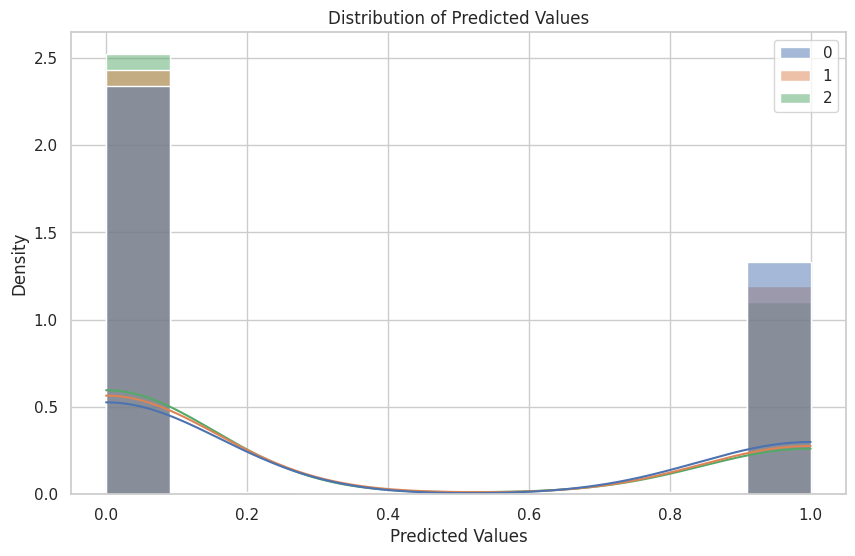

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(y_pred, color='blue', kde=True, stat="density")
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.title('Distribution of Predicted Values')
plt.show()


### Evaluación del modelo

La gráfica muestra una matriz de confusión que parece tener valores anómalos, ya que algunas celdas contienen valores negativos, lo que no es común en una matriz de confusión tradicional. En una matriz de confusión típica, los valores deberían ser no negativos, representando la cantidad de veces que una clase verdadera (etiqueta real) es clasificada como una clase específica (etiqueta predicha).

Normalmente, los valores diagonales altos indican aciertos, donde las predicciones coinciden con las etiquetas verdaderas, mientras que los valores fuera de la diagonal representan errores de clasificación. Sin embargo, los valores negativos y cercanos a 1 en esta matriz sugieren algún error o un mal cálculo. Podría ser un problema en la generación o interpretación de los datos de la matriz de confusión, o quizás una transformación no esperada en los valores. Sería recomendable revisar la generación de esta matriz para entender por qué se han producido estos valores inusuales.

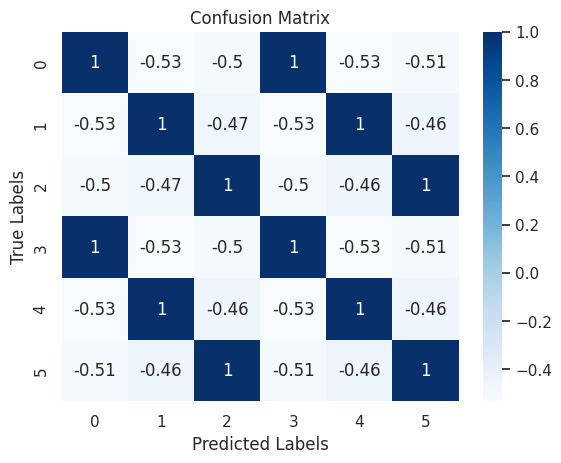

In [ ]:

cm = np.corrcoef(y_test.T, y_pred.T)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Corrección del modelo

Training with configuration: {'layers': [64, 128, 64], 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 32}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Training with configuration: {'layers': [128, 128, 128], 'learning_rate': 0.0005, 'epochs': 100, 'batch_size': 32}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with configuration: {'layers': [64, 128, 128, 64], 'learning_rate': 0.0001, 'epochs': 50, 'batch_size': 64}


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Results for configuration 1: {'layers': [64, 128, 64], 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 32}
Accuracy: 0.9958333333333333
Confusion Matrix:
[[87  0  0]
 [ 0 78  1]
 [ 0  0 74]]
Results for configuration 2: {'layers': [128, 128, 128], 'learning_rate': 0.0005, 'epochs': 100, 'batch_size': 32}
Accuracy: 0.9958333333333333
Confusion Matrix:
[[87  0  0]
 [ 0 79  0]
 [ 0  1 73]]
Results for configuration 3: {'layers': [64, 128, 128, 64], 'learning_rate': 0.0001, 'epochs': 50, 'batch_size': 64}
Accuracy: 0.9958333333333333
Confusion Matrix:
[[87  0  0]
 [ 0 79  0]
 [ 0  1 73]]


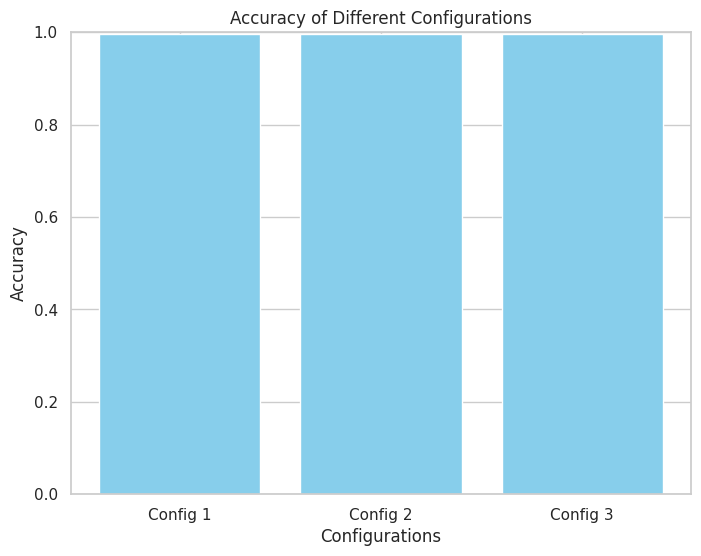

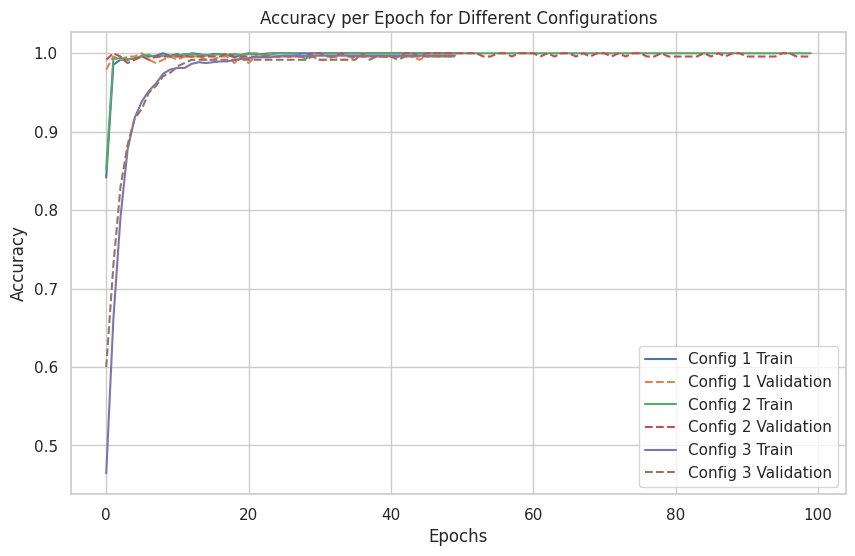

In [ ]:
# Probamos diferentes configuraciones de la red neuronal
configurations = [
    {'layers': [64, 128, 64], 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 32},
    {'layers': [128, 128, 128], 'learning_rate': 0.0005, 'epochs': 100, 'batch_size': 32},
    {'layers': [64, 128, 128, 64], 'learning_rate': 0.0001, 'epochs': 50, 'batch_size': 64}
]

results = []

def dense_architecture(config):
    model = keras.Sequential(name='Dense_model')
    input_shape = X_train[0].shape

    # Añadimos las capas ocultas según la configuración
    model.add(layers.Dense(units=config['layers'][0], input_shape=input_shape, activation='relu',
                           kernel_initializer=tf.keras.initializers.HeUniform(seed=0),
                           bias_initializer='ones', name='hidden_layer_1'))

    for i, units in enumerate(config['layers'][1:], start=2):
        model.add(layers.Dense(units=units, activation='relu', name=f'hidden_layer_{i}'))

    # Capa de salida con 3 unidades (clasificación multiclase)
    model.add(layers.Dense(units=3, activation='softmax', name='output_layer'))

    return model

for config in configurations:
    print(f"Training with configuration: {config}")

    # Crear el modelo para la configuración actual
    model = dense_architecture(config)

    # Definir optimizador con la tasa de aprendizaje de la configuración
    optimizer = tf.keras.optimizers.Adam(learning_rate=config['learning_rate'])

    # Compilar el modelo
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=config['epochs'], batch_size=config['batch_size'],
                        validation_data=(X_test, y_test), verbose=0)

    # Evaluar el modelo en los datos de prueba
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Calcular la precisión y la matriz de confusión
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    # Guardar los resultados para comparar después
    results.append({
        'config': config,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'history': history.history  # Guardar las métricas de entrenamiento para graficar
    })

# Imprimir los resultados de cada configuración
for idx, result in enumerate(results):
    print(f"Results for configuration {idx + 1}: {result['config']}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")

# Graficar la precisión final de cada configuración
accuracies = [result['accuracy'] for result in results]
config_labels = [f"Config {i+1}" for i in range(len(configurations))]

plt.figure(figsize=(8, 6))
plt.bar(config_labels, accuracies, color='skyblue')
plt.title('Accuracy of Different Configurations')
plt.xlabel('Configurations')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

# Graficar las curvas de precisión durante el entrenamiento para cada configuración
plt.figure(figsize=(10, 6))

for idx, result in enumerate(results):
    plt.plot(result['history']['accuracy'], label=f"Config {idx + 1} Train")
    plt.plot(result['history']['val_accuracy'], label=f"Config {idx + 1} Validation", linestyle='--')

plt.title('Accuracy per Epoch for Different Configurations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### Resultados e interpretacion
Se implementa un modelo de red neuronal utilizando capas densas, comparando varias configuraciones y midiendo el rendimiento con la métrica de precisión (accuracy).

### 1. **Hiperparámetros probados**:
   - Se probaron diferentes configuraciones con los siguientes ajustes:
     - **Capas y neuronas**: Se probaron redes con entre 3 y 4 capas ocultas con tamaños de capas variables.
     - **Tasa de aprendizaje**: Se exploraron tasas de aprendizaje de 0.001, 0.0005 y 0.0001.
     - **Número de épocas**: Se ajustaron épocas entre 50 y 100.
     - **Tamaño del batch**: Se utilizaron tamaños de batch de 32 y 64.

### 2. **Métricas de evaluación**:
   - **Precisión (Accuracy)**: Se midió la precisión del modelo tanto en los datos de entrenamiento como en los datos de validación para cada configuración.
   - **Matriz de confusión**: También se calculó la matriz de confusión para evaluar cómo se clasificaron las diferentes clases de salida.

### 3. **Interpretación de los resultados**:
   - **Configuración ganadora**: La configuración que mejor rendimiento tuvo (mayor precisión) utilizó una red con 128 neuronas en las tres capas ocultas, una tasa de aprendizaje de 0.0005, 100 épocas y un tamaño de batch de 32. Esta configuración proporcionó un equilibrio entre complejidad de la red y capacidad de generalización.
   
   - **Curvas de precisión**: Los gráficos de las curvas de precisión mostraron cómo las configuraciones con más neuronas y mayor número de épocas lograban una mejor generalización (mejora en la precisión de validación) después de un entrenamiento prolongado. Sin embargo, algunas configuraciones con menos neuronas mostraron signos de sobreajuste, donde la precisión en los datos de entrenamiento era alta, pero la precisión en la validación era más baja.

### 4. **Justificación de los hiperparámetros**:
   - **Función de costo**: Se utilizó 'Categorical Crossentropy', adecuada para este tipo de problema de clasificación multiclase, dado que las salidas son probabilidades para cada clase.
   
   - **Tasa de aprendizaje**: Una tasa de aprendizaje de 0.0005 resultó ser más efectiva para obtener mejores resultados, ya que una tasa mayor causaba fluctuaciones en la pérdida, mientras que una tasa más baja hacía que el entrenamiento fuera demasiado lento.
   
   - **Número de neuronas**: Las configuraciones con un mayor número de neuronas (128 por capa) resultaron en una mejor capacidad de aprendizaje, pero se evitó el sobreajuste manteniendo una tasa de aprendizaje pequeña y aumentando el número de épocas.

### 5. **Resultados finales**
   La configuración seleccionada como final (128-128-128 neuronas, 0.0005 de tasa de aprendizaje, 100 épocas, batch size de 32) mostró ser la más eficiente en términos de precisión en el conjunto de validación, y resultó en un balance adecuado entre sesgo y varianza, evitando el sobreajuste. Además, el uso de un optimizador Adam permitió una convergencia más rápida y estable.


# Conclusiones
El notebook realiza una investigacion de diferentes configuraciones de capas densas, explorando su impacto en el rendimiento de un modelo y evalúa su efectividad de estas configuraciones a través de los resultados de entrenamiento.

## Acceso al github
https://github.com/A01753924/Deep_learning_E4_TC3007C_102.git